In [149]:
import importlib
import function

importlib.reload(function)



<module 'function' from '/Users/fusawayugo/Desktop/class/人工知能演習/ai_experiment/dot_matching/function.py'>

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from itertools import combinations

importlib.reload(function)
from function import csv_to_data,calc_dist,calc_theta,rotate_point,match_points,do_possibility


In [ ]:
def csv_to_human_test_data(filename):
    df=pd.read_csv(filename)

    names=df['name'].values
    x=df['x'].values
    y=df['y'].values
    p=df['p'].values
    position=np.column_stack((x,y))
    idx_Lsho=np.where(names=='L_shoulder')[0][0]
    idx_Rsho=np.where(names=='R_shoulder')[0][0]
    neck_position=(position[idx_Lsho]+position[idx_Rsho])/2

    idx_Lwai=np.where(names=='L_waist')[0][0]
    idx_Rwai=np.where(names=='R_waist')[0][0]
    stomach_position=(position[idx_Lwai]+position[idx_Rwai])/2

    new_name=np.array(['Neck','Stomach'])
    new_position=np.array([neck_position,stomach_position])
    names=np.concatenate((new_name,names))
    position=np.vstack((new_position,position))
    
    return names,position






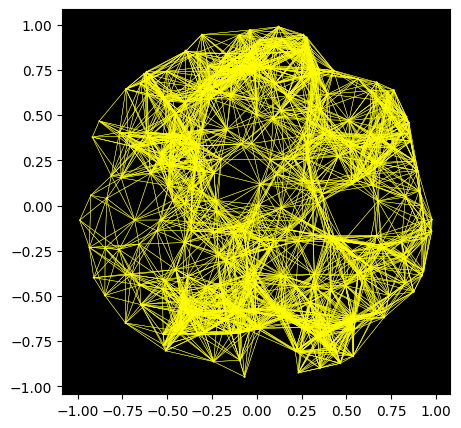

In [44]:
#north
x,y,lum,HIPnum=csv_to_data('../star_data/north.csv')
data = np.column_stack((x,y,lum,HIPnum))
position=np.column_stack((x,y))
edge_dist={}
for i in range(len(data)):
    dist_l=[]
    for j in range(len(data)):
        if i==j:
            continue
        dist=calc_dist(position[i],position[j])
        dist_l.append((dist,HIPnum[j]))
    dist_l.sort(key=lambda x:x[0])
    min_list=dist_l
    min_point=[]
    for j in range(len(min_list)):
        if min_list[j][0]<0.3 :
            min_point.append(min_list[j][1])
    edge_dist[HIPnum[i]]=min_point

size=7*np.exp(-1*(lum+2)*np.log(2))
fig, ax = plt.subplots(figsize=(5,5))
ax.patch.set_facecolor('black')
ax.scatter(x,y,s=size,color='white')
for key in edge_dist:
    indice1=np.where(HIPnum==key)
    x1,y1,=x[indice1],y[indice1]
    for item in edge_dist[key]:
        indice2=np.where(HIPnum==item)
        x2,y2=x[indice2],y[indice2]
        plt.plot((x1,x2),(y1,y2),linewidth=0.3,color='yellow')

plt.show()
        


        




In [220]:
'''p=10

points = np.random.rand(p, 2)

for i in range(1,p):
    points[i]=points[i]-points[0]

points[0]=np.array([0,0])
norm=np.linalg.norm(points[1])
theta=calc_theta(points[1])
for i  in range(1,p):
    points[i]=rotate_point(points[i]/norm,(-1)*theta)

elements = [i for i in range(p)]

edge_list=[(0,1)]
for i in combinations(elements,2):
    if i!=(0,1):
        if do_possibility(0.15):
            edge_list.append(i)
        else:
            pass

for i in range(len(edge_list)):
    p1=points[edge_list[i][0]]
    p2=points[edge_list[i][1]]
    plt.plot((p1[0],p2[0]),(p1[1],p2[1]),color='blue')




plt.scatter(points[:, 0], points[:, 1],color='blue')



plt.show()'''

"p=10\n\npoints = np.random.rand(p, 2)\n\nfor i in range(1,p):\n    points[i]=points[i]-points[0]\n\npoints[0]=np.array([0,0])\nnorm=np.linalg.norm(points[1])\ntheta=calc_theta(points[1])\nfor i  in range(1,p):\n    points[i]=rotate_point(points[i]/norm,(-1)*theta)\n\nelements = [i for i in range(p)]\n\nedge_list=[(0,1)]\nfor i in combinations(elements,2):\n    if i!=(0,1):\n        if do_possibility(0.15):\n            edge_list.append(i)\n        else:\n            pass\n\nfor i in range(len(edge_list)):\n    p1=points[edge_list[i][0]]\n    p2=points[edge_list[i][1]]\n    plt.plot((p1[0],p2[0]),(p1[1],p2[1]),color='blue')\n\n\n\n\nplt.scatter(points[:, 0], points[:, 1],color='blue')\n\n\n\nplt.show()"

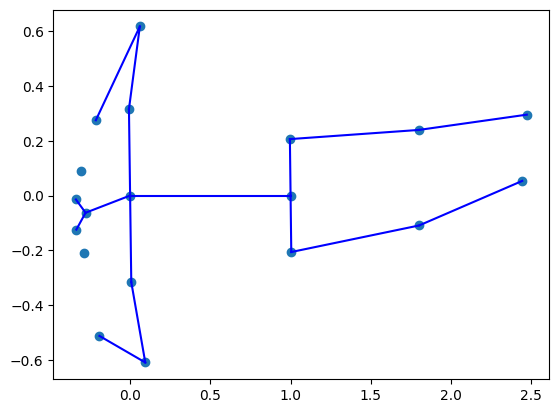

In [206]:
names,points=csv_to_human_test_data('../point_data/human_test/test_csv/person7.csv')
p=len(points)

edge_list=[(0,1),(0,2),(0,7),(0,8),(1,13),(1,14),(2,3),(2,4),(7,9),(8,10),(9,11),(10,12),(13,15),(14,16),(15,17),(16,18)]

for i in range(1,p):
    points[i]=points[i]-points[0]
points[0]=np.array([0,0])
norm=np.linalg.norm(points[1])
theta=calc_theta(points[1])
for i  in range(1,p):
    points[i]=rotate_point(points[i]/norm,(-1)*theta)

plt.scatter(points[:,0],points[:,1])
for edge in edge_list:
    p1=points[edge[0]]
    p2=points[edge[1]]
    plt.plot((p1[0],p2[0]),(p1[1],p2[1]),color='blue')



In [207]:
dotsize=200
a_x=(-1)*x+1
a_y=y+1


near_dot=[[-1 for _ in range(dotsize)] for _ in range(dotsize)]
near_dist=[[float('inf') for _ in range(dotsize)] for _ in range(dotsize)]

position=np.column_stack((a_x,a_y))
for i in range(dotsize):
    for j in range(dotsize):
        x_dot,y_dot=j/100,i/100
        dot=np.array([x_dot,y_dot])
        for k in range(len(data)):
            dist=calc_dist(dot,position[k])
            if dist<near_dist[i][j]:
                near_dist[i][j]=dist
                near_dot[i][j]=HIPnum[k]

print(near_dot)

            
            



[[104987.0, 104987.0, 104987.0, 104987.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 99473.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 97804.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 95501.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 92946.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 86742.0, 8674

In [249]:
points_size=len(points)
penalty_of_size=8*np.exp(-5*size*np.log(2)+1)

min_dist=float('inf')
min_stars=[-1 for _ in range(points_size)]
min_apoints=0

a_stars=np.column_stack((a_x*100,a_y*100))

for key in edge_dist:
    indice1=np.where(HIPnum==key)[0][0]
    star_0=np.array([a_x[indice1]*dotsize/2,a_y[indice1]*dotsize/2]).reshape(-1)
    for item in edge_dist[key]:
        indice2=np.where(HIPnum==item)[0][0]
        star_i=np.array([a_x[indice2]*dotsize/2,a_y[indice2]*dotsize/2]).reshape(-1)
        norm=np.linalg.norm(star_i-star_0)
        theta=calc_theta(star_i-star_0)
        a_points=match_points(points,norm,theta,star_0)
        near_stars=[-1 for _ in range(points_size)]
        dist=0
        for i in range(points_size):
            a_point=a_points[i]
            a_point_x=int(round(a_point[0],0))
            a_point_y=int(round(a_point[1],0))
            #ここの処理は変えたほうがいいかも
            if a_point_x<0 or a_point_x>=dotsize or a_point_y<0 or a_point_y>=dotsize:
                break
            indice3=np.where(HIPnum==near_dot[a_point_y][a_point_x])[0][0]
            nearest_star=np.array([a_x[indice3]*dotsize/2,a_y[indice3]*dotsize/2]).reshape(-1)
            dist+=np.sum((a_point-nearest_star)**2)/(norm**(2))
            near_stars[i]=indice3
            if dist>min_dist:
                break
            if i==points_size-1:
                shape_penalty_rate=0
                
                for j in range(points_size):
                    shape_penalty_rate+=penalty_of_size[near_stars[j]]
                    for k in range(j+1,points_size):
                        if near_stars[j]==near_stars[k]:
                            if (j,k) in edge_list:
                                shape_penalty_rate+=1.5
                            else:
                                shape_penalty_rate+=0.5
                dist=dist*(1+shape_penalty_rate)
                dist+=norm*points_size/100
                if dist>min_dist:
                    break
                min_dist=dist 
                min_stars=near_stars
                min_a_points=a_points
            if dist>min_dist:
                break
print(min_dist)
print(min_stars)
print(min_a_points)
            
        


55.40629578109498
[92, 70, 95, 95, 95, 95, 95, 87, 96, 81, 98, 84, 96, 70, 72, 49, 44, 30, 28]
[[107.49628463 174.60895234]
 [ 82.85445924 160.77658356]
 [113.4677675  179.99159101]
 [114.03485383 182.29877055]
 [115.62497364 179.63406563]
 [111.69687602 183.79448656]
 [116.22687621 176.57902809]
 [102.95088531 182.28872564]
 [112.04168395 166.92917903]
 [ 96.74439744 188.30439694]
 [114.53566211 158.57352094]
 [105.1308538  189.86974541]
 [116.56163924 170.79768908]
 [ 79.89917972 165.79165195]
 [ 85.80973875 155.76151517]
 [ 61.60778865 152.38443204]
 [ 66.4685339  143.82122198]
 [ 48.01913351 139.49073785]
 [ 50.66107607 133.14231251]]


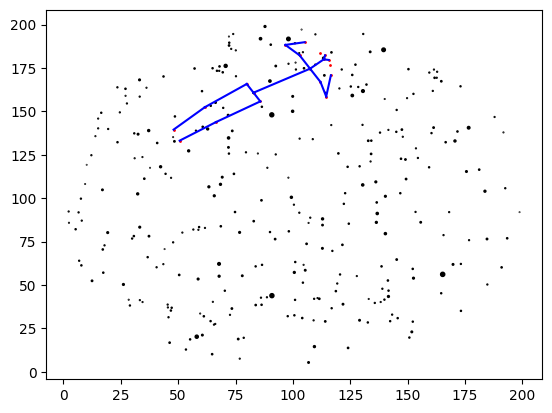

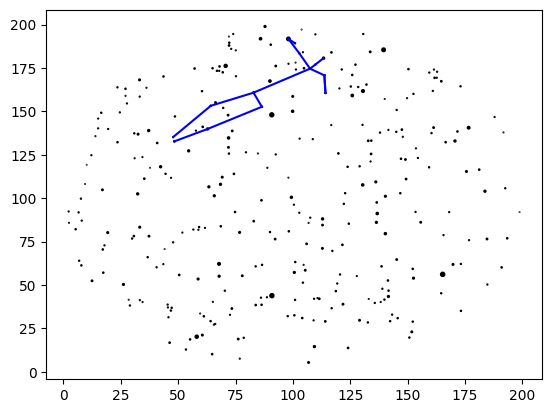

In [250]:
near_dot=np.array(near_dot)
plt.scatter(a_x*dotsize/2,a_y*dotsize/2,color='black',s=size*5)
plt.scatter(min_a_points[:,0],min_a_points[:,1],color='red',s=1)
for edge in edge_list:
    p1=min_a_points[edge[0]]
    p2=min_a_points[edge[1]]
    plt.plot((p1[0],p2[0]),(p1[1],p2[1]),color='blue')
plt.show()

plt.scatter(a_x*100,a_y*100,color='black',s=size*5)
for edge in edge_list:
    p1=a_stars[min_stars[edge[0]]]
    p2=a_stars[min_stars[edge[1]]]
    plt.plot((p1[0],p2[0]),(p1[1],p2[1]),color='blue')
plt.show()

In [231]:
print(min_stars)
type(min_stars[0])


[79, 58, 80, 85, 85, 87, 86, 78, 76, 75, 83, 81, 86, 61, 60, 46, 46, 41, 35]


numpy.int64

In [251]:

print(penalty_size)

[0.01317689 0.01475203 0.01853776 0.02788183 0.02109837 0.01445616
 0.02862319 0.02606326 0.0137829  0.02383086 0.02806949 0.02529507
 0.01317689 0.02643099 0.02660366 0.01743107 0.02683802 0.02281355
 0.02583909 0.02526317 0.02186801 0.02391007 0.02627712 0.02151537
 0.01729685 0.02366991 0.01340488 0.01271862 0.01958028 0.02557412
 0.02766173 0.02538968 0.01241167 0.02690561 0.0246573  0.02211295
 0.02529507 0.02276842 0.02513376 0.02346395 0.02653055 0.01661363
 0.01903655 0.02136075 0.01332898 0.0110223  0.02276842 0.02510094
 0.01963954 0.02375081 0.02281355 0.0262246  0.0186009  0.02707988
 0.018975   0.02429376 0.02181833 0.02294759 0.02346395 0.02538968
 0.02239931 0.02176841 0.0044683  0.02529507 0.02066638 0.02554382
 0.02307964 0.02779931 0.02526317 0.02635474 0.01763086 0.02589612
 0.02312321 0.00110608 0.02734539 0.00986532 0.00994214 0.01453034
 0.02171827 0.01940111 0.02566398 0.00233935 0.01187246 0.01736406
 0.02479723 0.0274609  0.0249341  0.0257523  0.02835192 0.0258